In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [2]:
db = CaseDB()

toload = [ 
    dict(name="base_AFN_nocondlim", id="hn2d1i-AFN_nocondlim_widev2", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="hotneut_AFN", id="hn4d-hnthresh_0_widev2_AFN", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="core_neumann", id="hn4de-neumann_core", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="exact_neumann", id="hn4de-exact_neumann", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="no_cold_cond", id="hn4e-4d_no_cold_cond", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="no_pump", id="hn4e-hnthresh_0_widev2_AFN_nopump", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case hn2d1i-AFN_nocondlim_widev2
-----------------------
- Looking for squash file
- Squash file found. squash date 04/22/2024, 16:10:51, dmp file date 04/22/2024, 15:44:58


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case hn4d-hnthresh_0_widev2_AFN
-----------------------
- Looking for squash file
- Squash file found. squash date 04/22/2024, 19:35:30, dmp file date 04/22/2024, 19:26:04


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case hn4de-neumann_core
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case hn4de-exact_neumann
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case hn4e-4d_no_cold_cond
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case hn4e-hnthresh_0_widev2_AFN_nopump
-----------------------
- Looking for squash file
- Squash file found. squash date 04/22/2024, 19:36:39, dmp file date 04/23/2024, 15:33:47
- dmp files are newer than the squash file! Recreating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1134: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


# Read SOLEDGE

In [3]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

# Read SOLPS

In [4]:
solpscases = {
    # "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    # "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    # "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    # "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    # "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    # "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    # "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    # "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    # "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    # "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
    "tightwall_2e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19",
    "tightwall_noD2_1e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2",
    "tightwall_noD2_2e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2",
    "tightwall_noD2_3e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2",
    
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    # sp[name].read_last10s(solpscases[name])
    sp[name].read_from_case(solpscases[name])

# Read Hermes-3

In [5]:
cs.keys()

dict_keys(['base_AFN_nocondlim', 'hotneut_AFN', 'core_neumann', 'exact_neumann', 'no_cold_cond', 'no_pump'])

In [6]:
hr = dict()
for name in cs.keys(): 
    print(name)
    hr[name] = Hermesdata()
    hr[name].read_case(cs[name].ds.isel(t=-1))

    
    ds = cs[name].ds
    ds = calculate_radial_fluxes(ds, new_afn = True)
    # ds = calculate_target_fluxes(ds)
    ds = reverse_pfr_fluxes(ds)

base_AFN_nocondlim
hotneut_AFN
core_neumann
exact_neumann
no_cold_cond
no_pump


In [7]:
# name = "hotneut"
# basename = "base_noAFN"
# compare  = sp["tightwall_noD2_2e19"]

name = "hotneut_AFN"
basename = "base_AFN_nocondlim"
compare  = sp["tightwall_noD2_2e19"]

In [9]:
cs.keys()

dict_keys(['base_AFN_nocondlim', 'hotneut_AFN', 'core_neumann', 'exact_neumann', 'no_cold_cond', 'no_pump'])

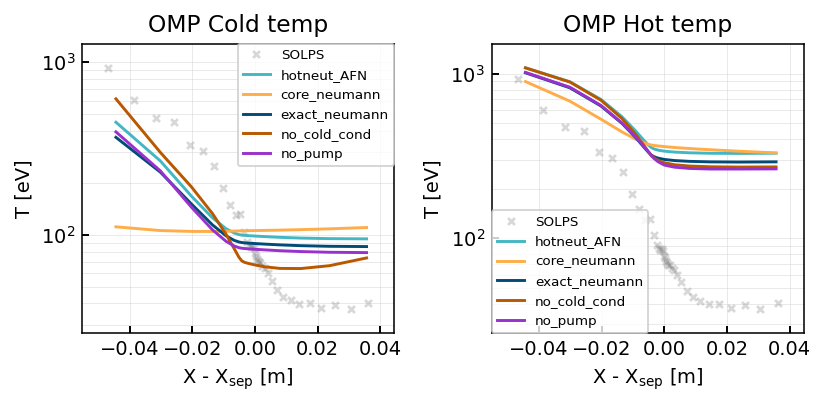

In [16]:


comp = compare.regions["omp"]
title = "OMP"

fig, axes = plt.subplots(1,2, figsize = (6,3))

x = np.cumsum(reg["dr"]).values
x = x - x[ds.metadata["ixseps1"]]
kwargs = dict(marker = "o", ms = 0)
totkwargs = dict(c = "grey", lw = 4, alpha = 0.2, label = "hot+cold")
basekwargs = dict(c = "grey", lw = 0, marker = "o", ms = 5, alpha = 0.3, markeredgewidth = 0, label = "base")
compkwargs = dict(c = "grey", lw = 0, marker = "x", ms = 1, alpha = 0.3, markeredgewidth = 5, label = "SOLPS")

ax = axes[0]
ax.set_title(f"{title} Cold temp")
ax.set_yscale("log")
ax.set_ylabel("T [eV]")
ax.plot(comp.index, comp["Ta"], **compkwargs)

ax = axes[1]
ax.set_title(f"{title} Hot temp")
ax.set_yscale("log")
ax.set_ylabel("T [eV]")
ax.plot(comp.index, comp["Ta"], **compkwargs)

for case in ['hotneut_AFN', 'core_neumann', 'exact_neumann', 'no_cold_cond', 'no_pump']:
    ds = cs[case].ds.isel(t=-1)
    reg = ds.hermesm.select_region("outer_midplane_a").isel(x = slice(2,-2))
    axes[0].plot(x, reg["Td"], label = case)
    axes[1].plot(x, reg["Td*"], label = case)



# ax = axes[2]
# ax.set_title(f"{title} Temperature")
# ax.set_ylabel("T [eV]")
# ax.set_yscale("log")
# ax.plot(x, reg["Td"], label = "cold", **kwargs)
# ax.plot(x, reg["Td*"], label = "hot", c = "darkorange", **kwargs)
# ax.plot(x, (reg["Pd"]+reg["Pd*"])/(reg["Nd*"]+reg["Nd"])/constants("q_e"), **totkwargs)
# ax.plot(x, reg2["Td"], **basekwargs)
# ax.plot(comp.index, comp["Ta"], **compkwargs)

for ax in axes:
    ax.legend(fontsize = "x-small")
    ax.set_xlabel("X - $X_{sep}$ [m]")

    ax.set_xscale("linear")
    
fig.tight_layout()


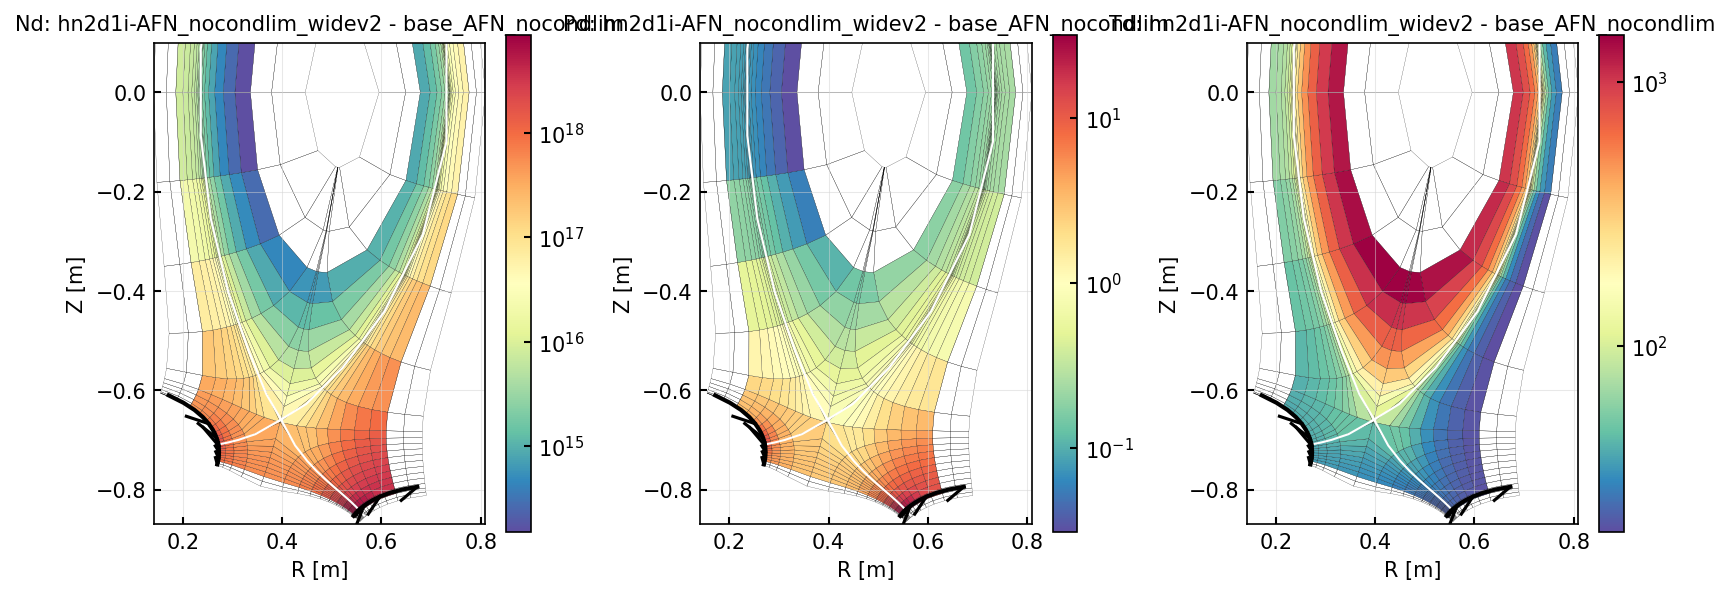

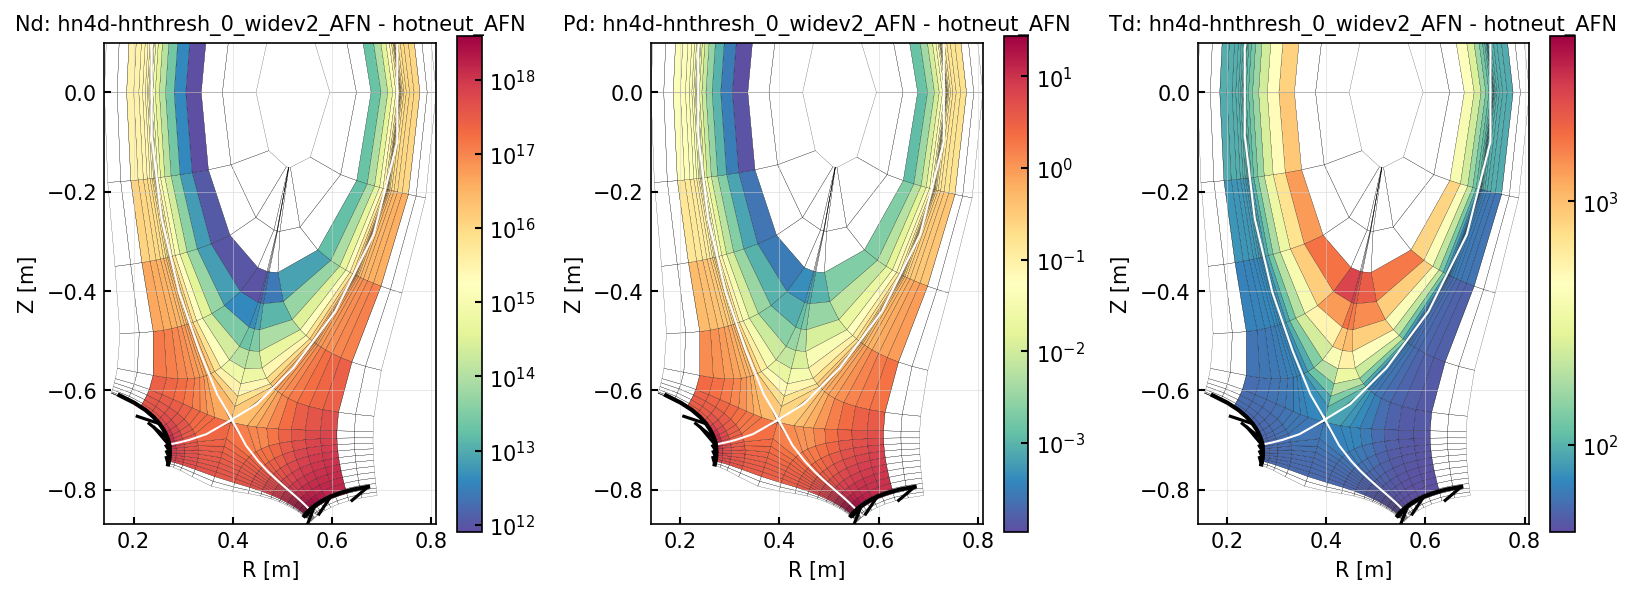

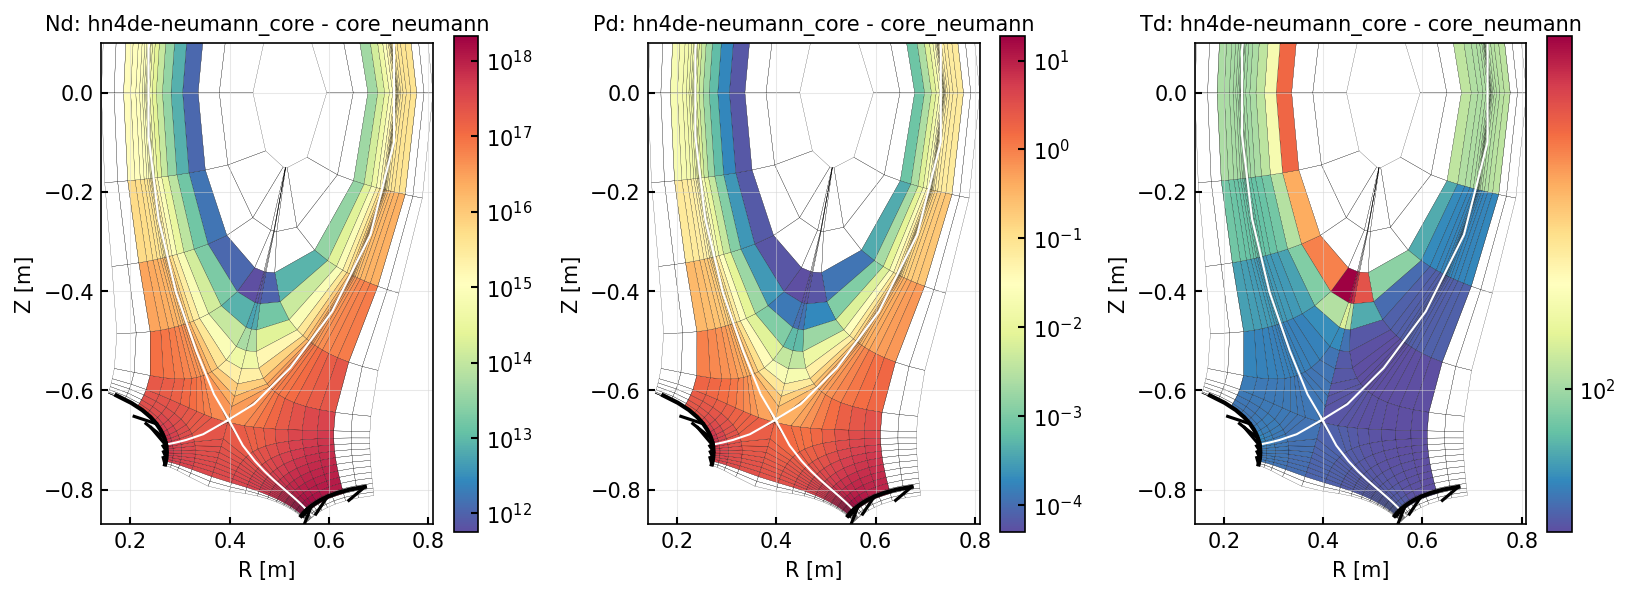

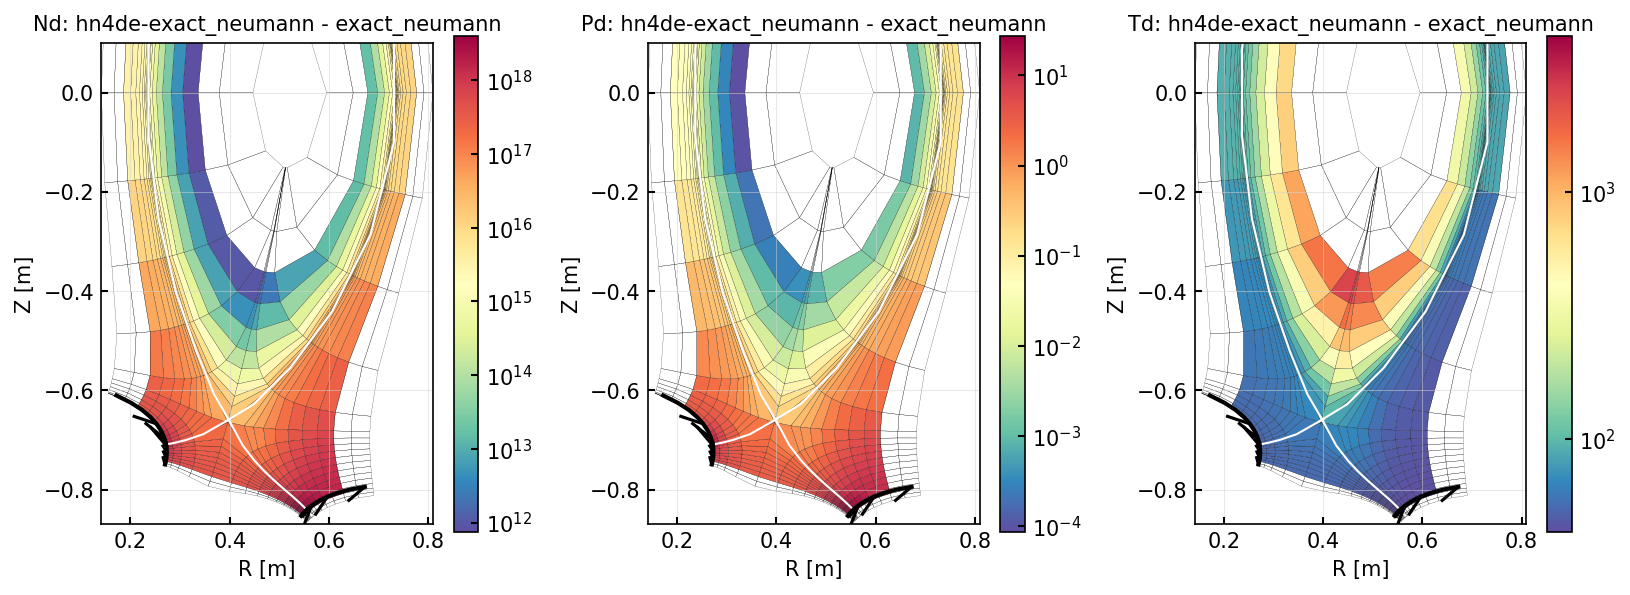

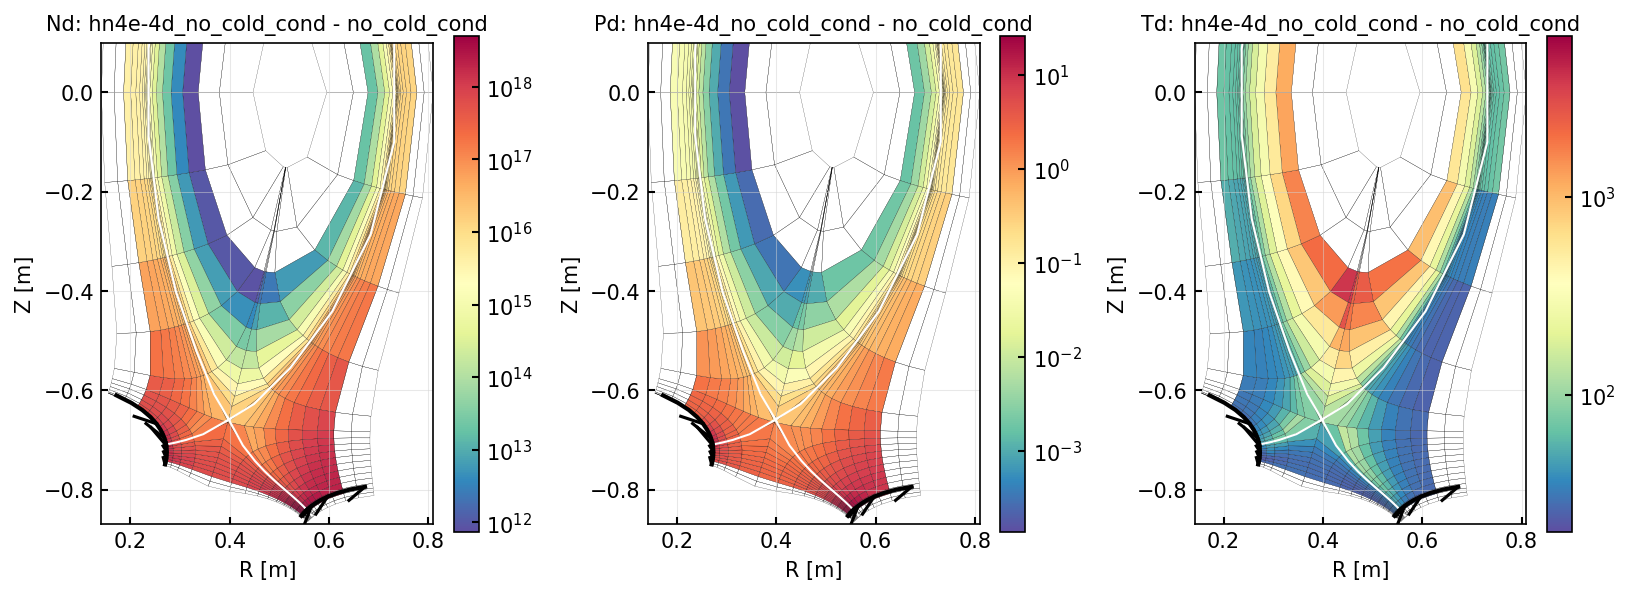

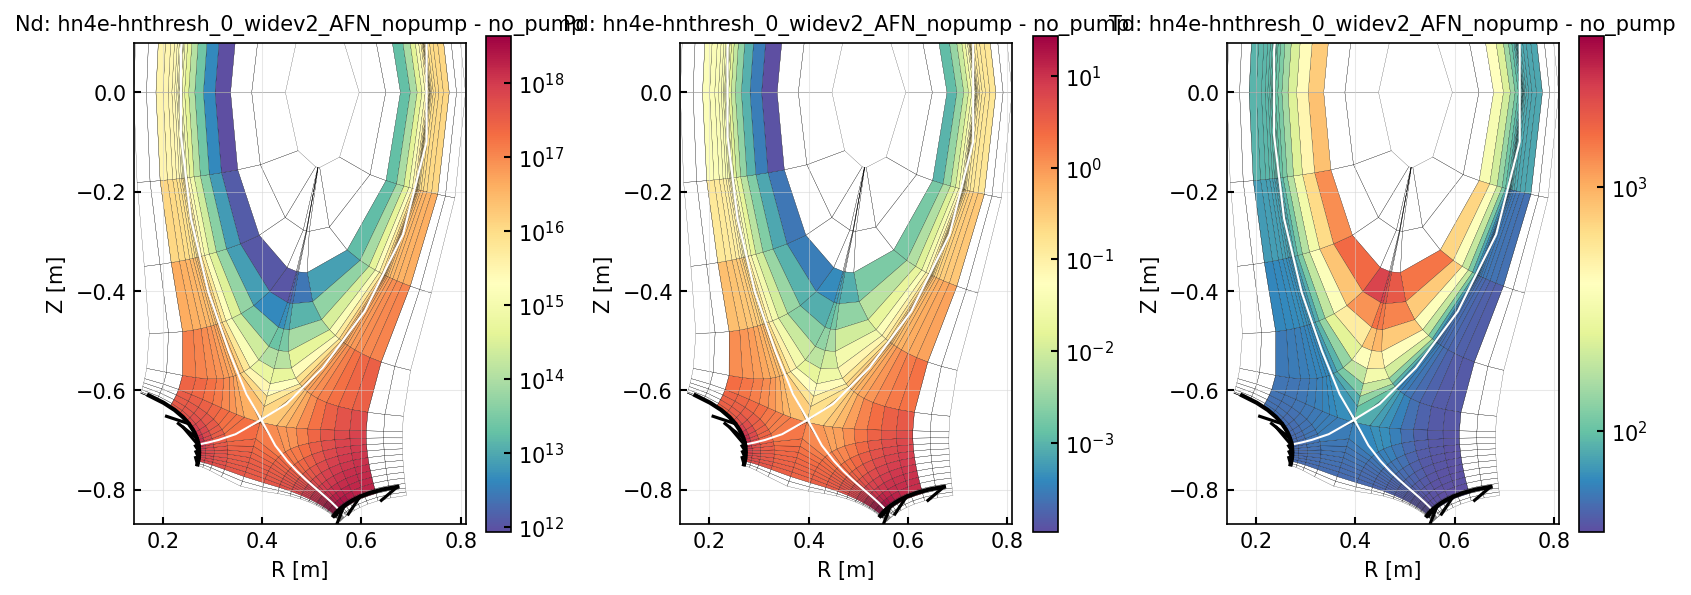

In [17]:
clean_guards = True

xlims = (None, None)
ylims = (-0.87,0.1)

# params = ["Te", "Td+", "Td"]
params = ["Nd", "Pd", "Td"]
sepkwargs = dict(linewidth = 1, color = "white", linestyle = "-")

for entry in toload:
    case = entry["name"]
    fig, axes = plt.subplots(1,3, figsize = (11,4), dpi = 150)
    newds = cs[case].ds.isel(t=-1)
    
    ax = axes[0]
    param = params[0]
    data = (newds[param])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True, separatrix_kwargs = sepkwargs)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_title(f"{param}: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[1]
    param = params[1]
    data = (newds[param])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True, separatrix_kwargs = sepkwargs)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_title(f"{param}: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[2]
    param = params[2]
    data = (newds[param])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True, separatrix_kwargs = sepkwargs)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_title(f"{param}: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    fig.tight_layout()


In [18]:
cs.keys()

dict_keys(['base_AFN_nocondlim', 'hotneut_AFN', 'core_neumann', 'exact_neumann', 'no_cold_cond', 'no_pump'])

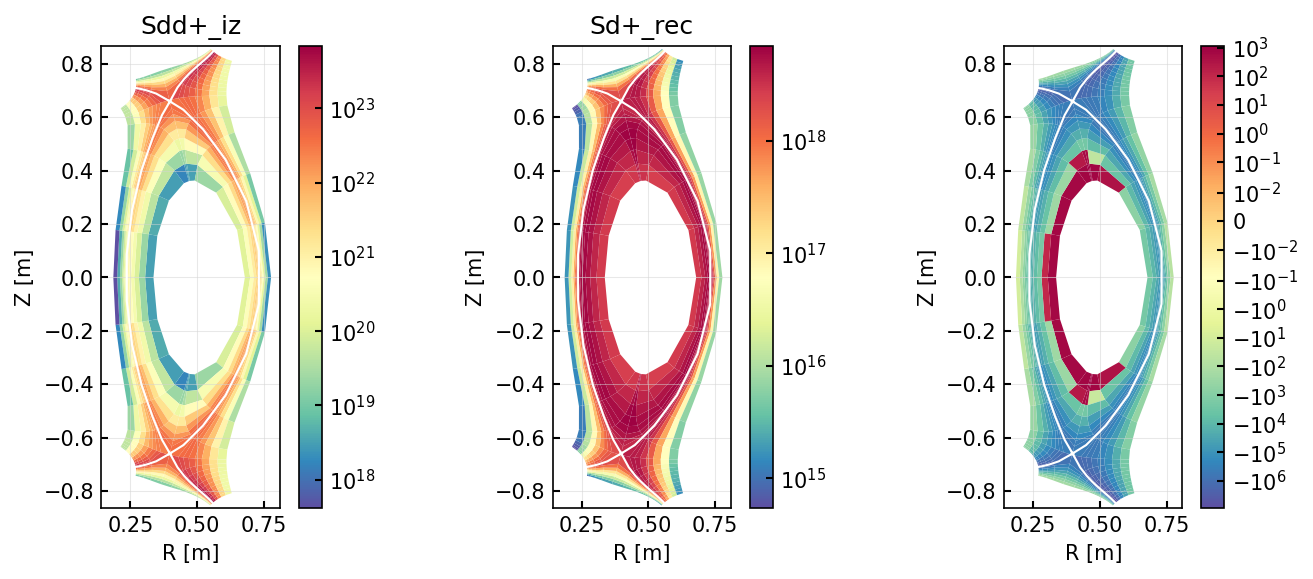

In [19]:
ds = cs["core_neumann"].ds.isel(t=-1)
# dSrcTot = ds["Ed_wall_refl"] + ds["Edd*_wall_refl"] + ds["Edd+_cxt"] + ds["Edd+_iz"]*-1 + ds["Ed+_rec"] * -1
dSrcTot = ds["Edd+_iz"]*-1 + ds["Ed+_rec"] * -1

fig, axes = plt.subplots(1,3, dpi = 150, figsize = (11,4))

(ds["Sdd+_iz"]).hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "Spectral_r", antialias = True, 
                                                            vmin = None, vmax = None, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(ds["Sd+_rec"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", antialias = True, 
                                                            vmin = None, vmax = None, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(dSrcTot).hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "Spectral_r", antialias = True, 
                                                            vmin = None, vmax = None, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

In [23]:
izrate = np.array([
    [-32.4802533034, -0.05440669186583, 0.09048888225109, -0.04054078993576,
     0.008976513750477, -0.001060334011186, 6.846238436472e-05, -2.242955329604e-06,
     2.890437688072e-08],
    [14.2533239151, -0.0359434716076, -0.02014729121556, 0.0103977361573,
     -0.001771792153042, 0.0001237467264294, -3.130184159149e-06, -3.051994601527e-08,
     1.888148175469e-09],
    [-6.632235026785, 0.09255558353174, -0.005580210154625, -0.005902218748238,
     0.001295609806553, -0.0001056721622588, 4.646310029498e-06, -1.479612391848e-07,
     2.85225125832e-09],
    [2.059544135448, -0.07562462086943, 0.01519595967433, 0.0005803498098354,
     -0.0003527285012725, 3.201533740322e-05, -1.835196889733e-06, 9.474014343303e-08,
     -2.342505583774e-09],
    [-0.442537033141, 0.02882634019199, -0.00728577148505, 0.0004643389885987,
     1.145700685235e-06, 8.493662724988e-07, -1.001032516512e-08, -1.476839184318e-08,
     6.047700368169e-10],
    [0.06309381861496, -0.00578868653578, 0.00150738295525, -0.0001201550548662,
     6.574487543511e-06, -9.678782818849e-07, 5.176265845225e-08, 1.29155167686e-09,
     -9.685157340473e-11],
    [-0.005620091829261, 0.000632910556804, -0.0001527777697951, 8.270124691336e-06,
     3.224101773605e-08, 4.377402649057e-08, -2.622921686955e-09, -2.259663431436e-10,
     1.161438990709e-11],
    [0.0002812016578355, -3.564132950345e-05, 7.222726811078e-06, 1.433018694347e-07,
     -1.097431215601e-07, 7.789031791949e-09, -4.197728680251e-10, 3.032260338723e-11,
     -8.911076930014e-13],
    [-6.011143453374e-06, 8.089651265488e-07, -1.186212683668e-07, -2.381080756307e-08,
     6.271173694534e-09, -5.48301024493e-10, 3.064611702159e-11, -1.355903284487e-12,
     2.935080031599e-14]
    ])

recrate = np.array([
    [-28.58858570847, 0.02068671746773, -0.007868331504755, 0.003843362133859,
     -0.0007411492158905, 9.273687892997e-05, -7.063529824805e-06, 3.026539277057e-07,
     -5.373940838104e-09],
    [-0.7676413320499, 0.0127800603259, -0.01870326896978, 0.00382855504889,
     -0.0003627770385335, 4.401007253801e-07, 1.932701779173e-06, -1.176872895577e-07,
     2.215851843121e-09],
    [0.002823851790251, -0.001907812518731, 0.01121251125171, -0.003711328186517,
     0.0006617485083301, -6.860774445002e-05, 4.508046989099e-06, -1.723423509284e-07,
     2.805361431741e-09],
    [-0.01062884273731, -0.01010719783828, 0.004208412930611, -0.00100574441054,
     0.0001013652422369, -2.044691594727e-06, -4.431181498017e-07, 3.457903389784e-08,
     -7.374639775683e-10],
    [0.001582701550903, 0.002794099401979, -0.002024796037098, 0.0006250304936976,
     -9.224891301052e-05, 7.546853961575e-06, -3.682709551169e-07, 1.035928615391e-08,
     -1.325312585168e-10],
    [-0.0001938012790522, 0.0002148453735781, 3.393285358049e-05, -3.746423753955e-05,
     7.509176112468e-06, -8.688365258514e-07, 7.144767938783e-08, -3.367897014044e-09,
     6.250111099227e-11],
    [6.041794354114e-06, -0.0001421502819671, 6.14387907608e-05, -1.232549226121e-05,
     1.394562183496e-06, -6.434833988001e-08, -2.746804724917e-09, 3.564291012995e-10,
     -8.55170819761e-12],
    [1.742316850715e-06, 1.595051038326e-05, -7.858419208668e-06, 1.774935420144e-06,
     -2.187584251561e-07, 1.327090702659e-08, -1.386720240985e-10, -1.946206688519e-11,
     5.745422385081e-13],
    [-1.384927774988e-07, -5.664673433879e-07, 2.886857762387e-07, -6.591743182569e-08,
     8.008790343319e-09, -4.805837071646e-10, 6.459706573699e-12, 5.510729582791e-13,
     -1.680871303639e-14]
])

from sd1d.analysis import AMJUEL




In [21]:
cs.keys()

dict_keys(['base_AFN_nocondlim', 'hotneut_AFN', 'core_neumann', 'exact_neumann', 'no_cold_cond', 'no_pump'])

*****************************
Excel saves precision as it appears, not as what the number has.......
*****************************


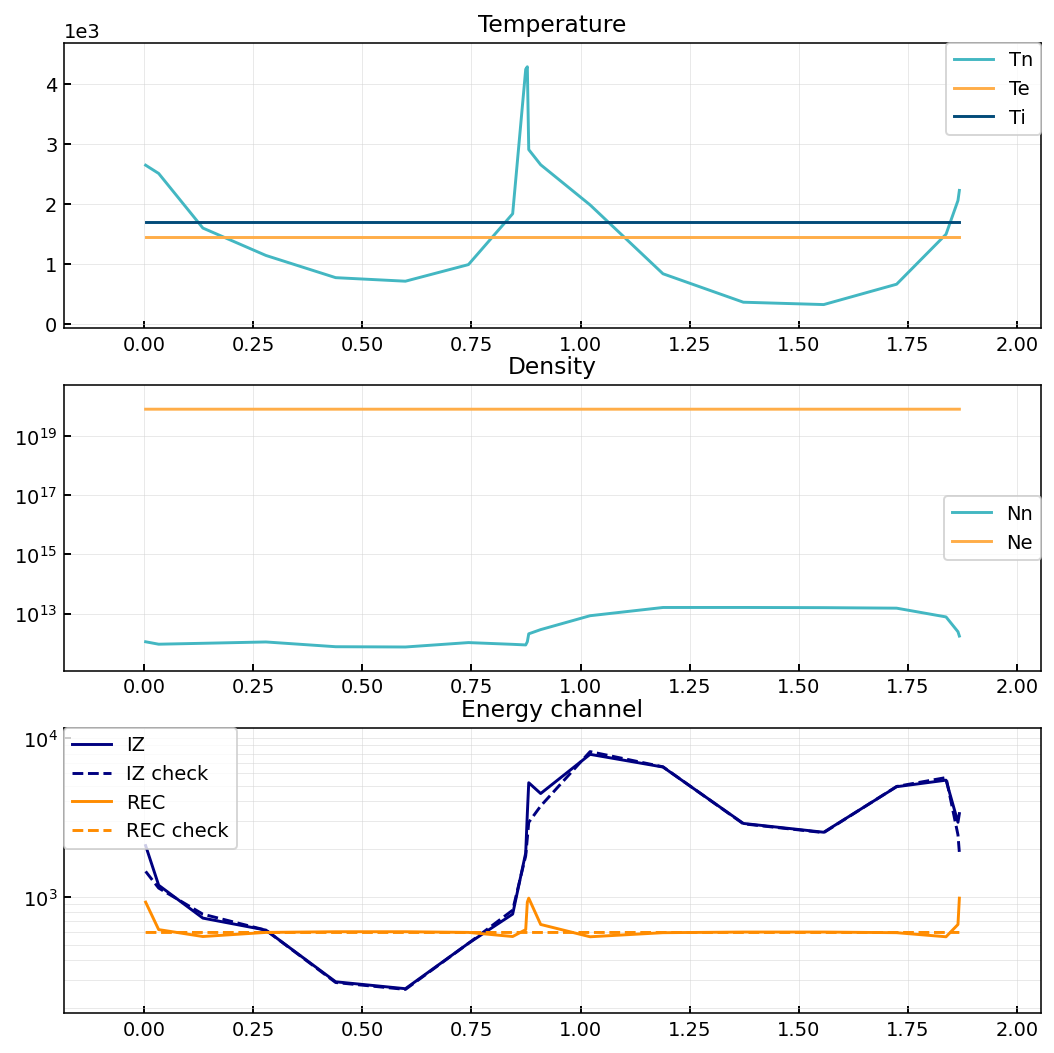

In [33]:
ds = cs["exact_neumann"].ds.isel(t=-1)

# reg = ds.isel(x = slice(2,-2), theta = 45)   # Radial slice above X-point
reg = ds.hermesm.select_region("core_edge").sortby("theta").squeeze()
# reg = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))           # OMP

fig, axes = plt.subplots(3,1, figsize = (9,9))

# x = reg["dr"].cumsum()
# x -= x[ds.metadata["ixseps1"] - ds.metadata["MXG"]]

x = reg["dl"].cumsum()

Te = reg["Te"].values
Ne = reg["Ne"].values

amj = AMJUEL()
Krec = amj.amjuel_2d("rec", Te, Ne, data = recrate)
Kiz = amj.amjuel_2d("rec", Te, Ne, data = izrate)

ax = axes[0]
ax.set_title("Temperature")
ax.plot(x, reg["Td"], label = "Tn")
ax.plot(x, reg["Te"], label = "Te")
ax.plot(x, reg["Td+"], label = "Ti")
ax.legend()

# ax = axes[0,1]
# ax.set_title("Density channel")
# ax.set_yscale("log")
# ax.plot(x, reg["Sdd+_iz"], c = "navy", label = "IZ")
# ax.plot(x, Kiz * reg["Ne"] * reg["Nd"], c = "navy", ls = "--", label = "IZ check")
# ax.plot(x, reg["Sd+_rec"]*-1, c = "darkorange", label = "REC")
# ax.plot(x, Krec * reg["Ne"]**2, c = "darkorange", ls = "--", label = "REC check")
# ax.legend()

ax = axes[1]
ax.set_title("Density")
ax.set_yscale("log")
ax.plot(x, reg["Nd"], label = "Nn")
ax.plot(x, reg["Ne"], label = "Ne")
ax.legend()

ax = axes[2]
ax.set_title("Energy channel")
ax.set_yscale("log")
ax.plot(x, reg["Edd+_iz"], c = "navy", label = "IZ")
ax.plot(x, Kiz * reg["Ne"] * reg["Nd"] * reg["Td"] * (3/2) * constants("q_e"), c = "navy", ls = "--", label = "IZ check")
ax.plot(x, reg["Ed+_rec"]*-1, c = "darkorange", label = "REC")
ax.plot(x, Krec * reg["Ne"]**2 * reg["Td+"] * (3/2) * constants("q_e"), c = "darkorange", ls = "--", label = "REC check")
ax.legend()